In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [6]:
df=pd.read_csv('WineQT.csv',header=None,usecols=[0,1,2])
df


,0,1,2
0,fixed acidity,volatile acidity,citric acid
1,7.4,0.7,0.0
2,7.8,0.88,0.0
3,7.8,0.76,0.04
4,11.2,0.28,0.56
...,...,...,...
1139,6.3,0.51,0.13
1140,6.8,0.62,0.08
1141,6.2,0.6,0.08
1142,5.9,0.55,0.1


<Axes: xlabel='quality', ylabel='Density'>

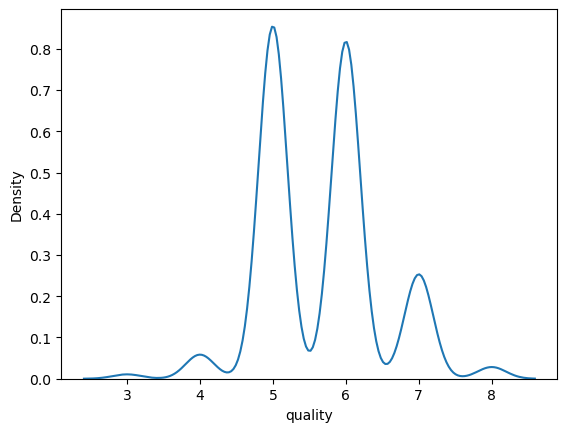

In [4]:
sns.kdeplot(df['quality'])

<Axes: xlabel='Id', ylabel='Density'>

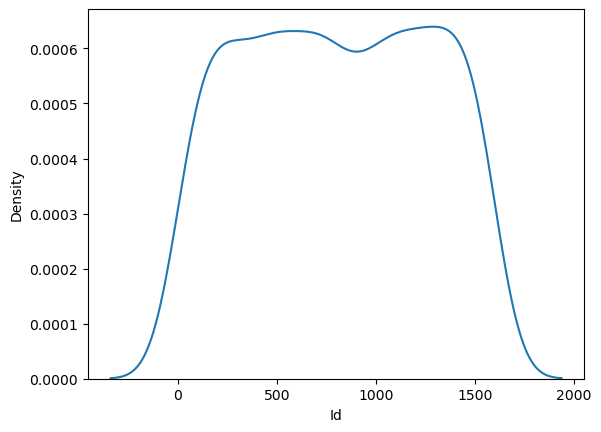

In [6]:
sns.kdeplot(df['Id'])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('density',axis=1),df['density'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((800, 12), (343, 12))

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# fit the scaler to the train set,it will learn the parameter
scaler.fit(x_train)

# transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [12]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_train_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)


In [13]:
np.round(x_train.describe(),1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Id
count,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
mean,8.3,0.5,0.3,2.5,0.1,15.3,46.2,3.3,0.6,10.5,5.7,788.1
std,1.8,0.2,0.2,1.3,0.0,10.0,32.8,0.2,0.2,1.1,0.8,467.9
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,2.9,0.3,8.4,3.0,0.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,21.0,3.2,0.6,9.5,5.0,376.8
50%,7.9,0.5,0.2,2.2,0.1,13.0,37.0,3.3,0.6,10.2,6.0,768.5
75%,9.1,0.6,0.4,2.6,0.1,21.0,63.0,3.4,0.7,11.2,6.0,1199.2
max,15.9,1.3,0.8,15.5,0.4,68.0,289.0,4.0,2.0,14.9,8.0,1597.0


In [14]:
np.round(x_train_scaled.describe(),1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Id
count,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0
mean,0.3,0.3,0.4,0.1,0.2,0.2,0.1,0.4,0.2,0.3,0.5,0.5
std,0.2,0.2,0.3,0.1,0.2,0.2,0.1,0.1,0.1,0.2,0.2,0.3
min,0.1,0.0,0.0,0.0,0.1,0.0,0.0,-0.1,0.0,0.0,0.0,0.0
25%,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.3,0.1,0.2,0.4,0.3
50%,0.3,0.3,0.3,0.1,0.2,0.2,0.1,0.4,0.2,0.3,0.6,0.5
75%,0.4,0.4,0.5,0.1,0.2,0.3,0.2,0.5,0.3,0.4,0.6,0.8
max,1.0,1.2,1.3,0.9,1.5,1.0,1.0,0.7,1.0,0.8,1.0,1.0


ValueError: 'c' argument has 800 elements, which is inconsistent with 'x' and 'y' with size 343.

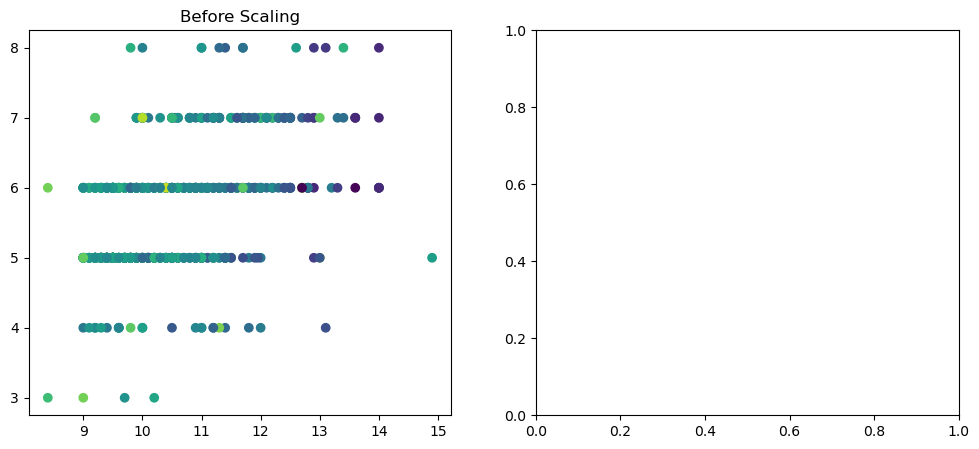

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['alcohol'], x_train['quality'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['alcohol'], x_train_scaled['quality'],c=y_train)
ax2.set_title("After Scaling")
plt.show()


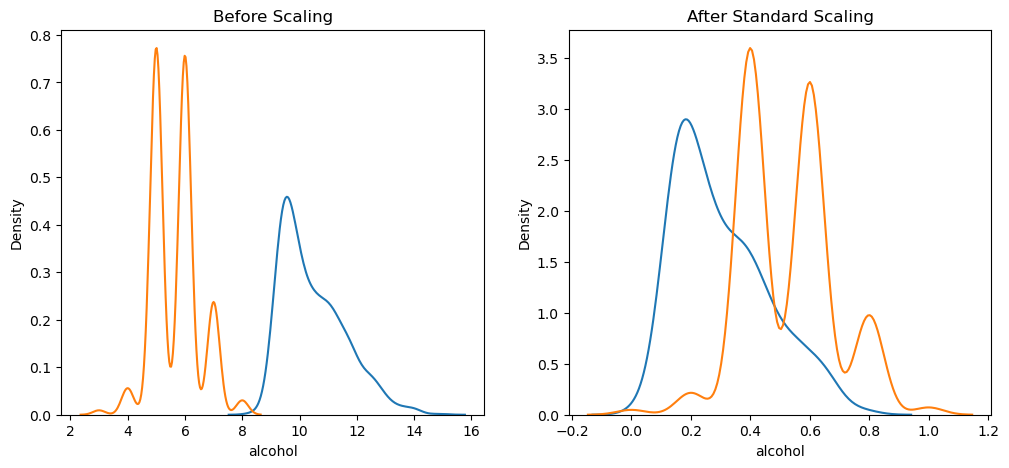

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)
sns.kdeplot(x_train['quality'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['quality'], ax=ax2)
plt.show()

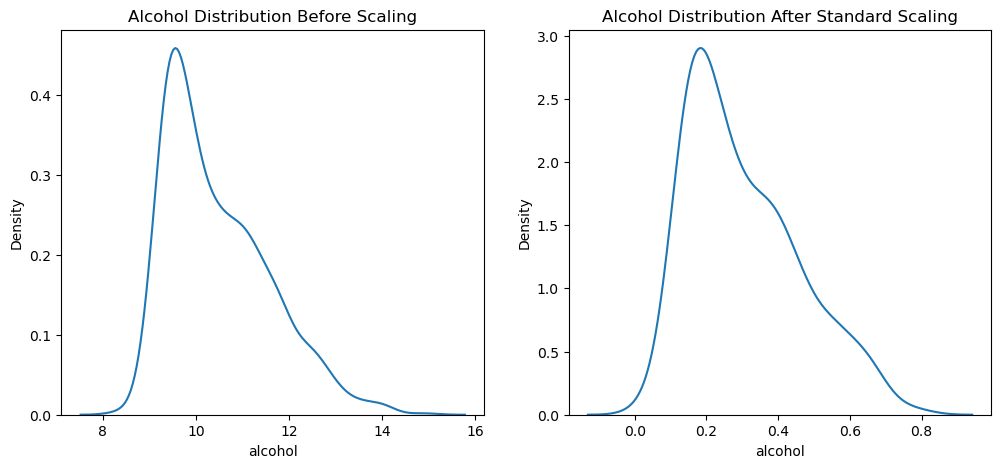

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
plt.show()


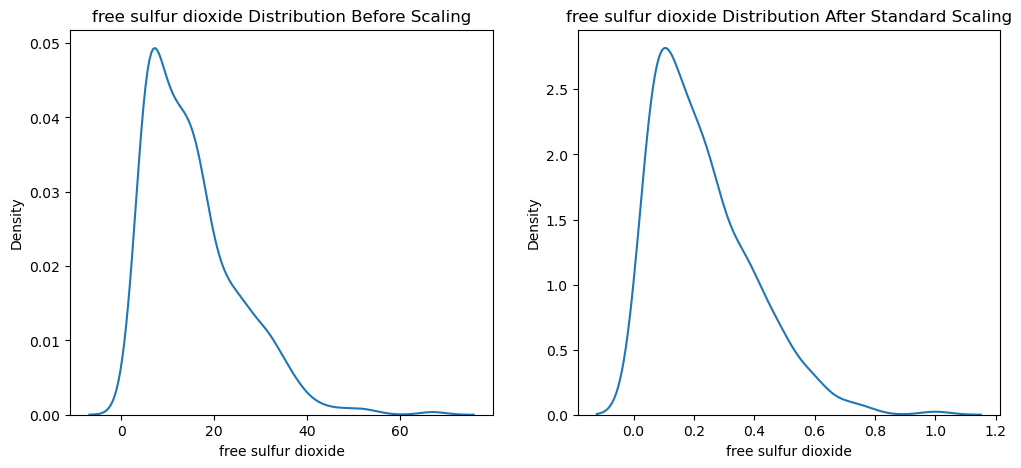

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('free sulfur dioxide Distribution Before Scaling')
sns.kdeplot(x_train['free sulfur dioxide'], ax=ax1)

# after scaling
ax2.set_title('free sulfur dioxide Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['free sulfur dioxide'], ax=ax2)
plt.show()
